The purpose of this program is to create a linear regression with a sample file.  It is not meant to provide a model to be used by others since there are already many available utilities such as stats.linregress which provides the same function. 
This program will allow people to learn what linear regression is and what formula is used to derive some values such as slope, intercept, p-value, covariance, correlation, R square.


In [1]:
import numpy as np
import pandas as pd
#import statistics as stat 
%matplotlib inline
from pylab import *
from scipy.stats import f

Read the sample regression file.  The regression file is a csv formatted file and contains two columns 

In [2]:
file_name="regression.txt"
df = pd.read_csv(file_name,header=None,names=["x","y"])
print("df.head()\n{}".format(df.head(5)))
print("df.sample()\n{}".format(df.sample(5)))
print("df.count\n{}".format(df.count()))

df.head()
      x     y
0 -1.74  1.66
1  1.24 -1.18
2  0.29 -0.40
3 -0.13  0.09
4 -0.39  0.38
df.sample()
        x     y
291 -0.08  0.14
599 -0.36  0.48
414  0.02  0.01
805 -1.66  1.61
892 -1.42  1.48
df.count
x    1000
y    1000
dtype: int64


Plot the graph to see how it looks

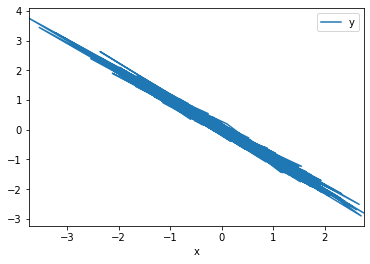

In [3]:
df.plot("x","y")

Need to convert it to the np arrays.  Not sure if df can be used to process the data, but np array should be handy

In [4]:
X=df.to_numpy()[:,0]
Y=df.to_numpy()[:,1]
print("X[10]{}".format(X[:10]))
print("Y[10]{}".format(Y[:10]))
X.shape

X[10][-1.74  1.24  0.29 -0.13 -0.39 -1.79  0.71  1.39  1.15  0.13]
Y[10][ 1.66 -1.18 -0.4   0.09  0.38  1.73 -0.77 -1.48 -1.43 -0.07]


(1000,)

The best fitted line will be in a form of y = b + mx where b is the intercept and m is the slope. 
The m for the best fitted line can be obtained by the m = r(std y/std x) where r is the correlation of x,y and std is the standard deviation 
In order to obtain the correlation, need to have few functions such as covariance, correlation, fit_line




In [5]:
# Covariance function 
def cov(X, Y):
    if len(X) != len(Y):
        retrun 
    x_mean= np.mean(X)
    y_mean= np.mean(Y)
#    print("X-mean \n{}".format(X-x_mean))
#    print("Y-mean \n{}".format(Y-y_mean))
    covar=sum((X-x_mean)*(Y-y_mean))/(len(X)-1)
    return(covar)
 
# Correlation function require covariance function.    
def corr(X, Y):
    if len(X) != len(Y):
        retrun 
    x_stdev=np.std(X)  
    y_stdev=np.std(Y)  
    covar=cov(X,Y)
    corr=covar/(x_stdev * y_stdev)
    return(corr)

# fit_line returns the value of slope and intercept for the best fitted line.
def fit_line(X,Y):
    if len(X) != len(Y):
        retrun    
    x_stdev=np.std(X)  
    y_stdev=np.std(Y) 
    x_mean=np.mean(X)
    y_mean=np.mean(Y)
 #   print("xmean", x_mean)
 #   print("ymean", y_mean)
    slope = corr(X,Y)*(y_stdev/x_stdev)  
    intercept = y_mean-slope*x_mean  
    return(slope, intercept)

# predict returns the y value of a given x with the slope and intercept.  
def predict(x,m,b):
    return(b+m*x)

# This function will return R Square value
# The formula for R2 = {SS(mean) - SS(fit)} / SS(mean) where SS is sum of square.
# also = {var(mean) - var(fit)} / var(mean) where var is the variance Also note that var = ss/N
def find_R2(X, Y):
    y_mean= np.mean(Y)
    Y_fit=predict(X,m,b)

    ss_mean = sum((Y-y_mean)**2)             # sum of square of mean value
    ss_fit = sum((Y-Y_fit)**2)               # sum of square of fitted line
    R2 = (ss_mean - ss_fit)/ss_mean          # R square 
    return (R2)                                      
    
# This function will return the F value.  F value is used to calculate p-value
def find_F(X, Y):
    y_mean= np.mean(Y)
    Y_fit=predict(X,m,b)

    ss_mean = sum((Y-y_mean)**2)             # sum of square of mean value
    ss_fit = sum((Y-Y_fit)**2)               # sum of square of fitted line
   
    p_fit = 2                               # number of variables in fitted line m,b
    p_mean = 1                               # number of variables in calculate mean
    n = len(Y)                               # total number of samples
    F = (ss_mean-ss_fit)*(n-p_fit)/(ss_fit*(p_fit-p_mean))    # F value
    return (F)

In [6]:
#This cell is to test the functions to make sure they are correct. 

X1 = np.array([1,4,5,6])
Y1 = np.array([2,5,7,9])
x_stdev=np.std(X1)  
y_stdev=np.std(Y1) 
x_mean=np.mean(X1)
y_mean=np.mean(Y1)
print("xmean={}".format(x_mean))    
print("ymean={}".format(y_mean))
print("xstd={}".format(x_stdev))    
print("ystd={}".format(y_stdev))    
print('len(x)={}'.format(len(X1)))
print('convar={}'.format(cov(X1,Y1)))
print('corr={}'.format(corr(X1,Y1)))

m,b=fit_line(X1,Y1)
print("fit line m={}, b={}".format(m,b))






xmean=4.0
ymean=5.75
xstd=1.8708286933869707
ystd=2.5860201081971503
len(x)=4
convar=6.333333333333333
corr=1.3090807196329644
fit line m=1.8095238095238095, b=-1.4880952380952381


In [7]:
#now try to fit the origin data
m,b=fit_line(X,Y)
print("fit line m={}, b={}".format(m,b))
fitted_line=predict(X,m,b)

fit line m=-0.9959508203939803, b=-1.9797541019686195e-05


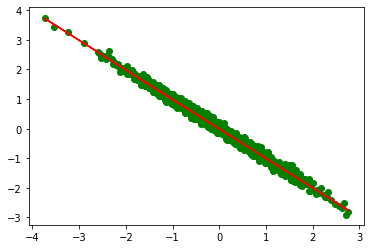

In [8]:
scatter(X, Y, c='g')
#plt.plot(X, Y, c='g')
plt.plot(X, fitted_line, c='r')
#plt.show()

Now we need to find the R_Square (R2).  
The formula for R2 = {SS(mean) - SS(fit)} / SS(mean) where SS is sum of square.  
                   = {var(mean) - var(fit)} / var(mean) where var is the variance 
Also note that var = ss/N

In [9]:
# I have added a find_R2 function so the above one is no longer needed.
R2=find_R2(X,Y)
print ("R2={}".format(R2))

R2=0.9899518181431389



Now let's find the last value P-value.  P-value can be obtained by using a F-distribute function. In order to use the F function we need to first find out the F value.
F = {(SS(mean) - SS(fit)) * (n - p_fit) } / {SS(fit) * (p_fit - p_mean) } where
p_fit = number of variables in the formula and ie = 2 (m, b)
p_mean = 1 (mean)


In [10]:
F=find_F(X,Y)
print("F={}".format(F))

F=98323.45080739663


In [11]:
# This meaning of this p-value is with the current F value, how rare is this to obtain F value using F distribution
# and degree of freedom from X and Y.  Assuming both X and Y and df1 and df2 are independent to each other.
# The smaller p-value indicate it is rare to get F value which means the Fitting is more confident

from scipy.stats import f
df1=len(X) - 1
df2=len(Y) - 1
#p_value = f.sf(F,p_fit,p_mean)

p_value = f.sf(F,df1,df2)

print("p_value={}".format(p_value))

p_value=0.0


Now lets compare the results with the regression from scipy to see if we are getting similar values.  All values are quite close excep I don't have std_err. For Linear Regression, standard error is not required (?)


In [12]:
from scipy.stats import linregress 

m_s,b_s,r_s,p_s, std_err_s = linregress(X, Y)

print("So the results : ")
print("              My Regression         vs        scipy Regression ")
print("slope     : {}              {}".format(m, m_s))  
print("intercept : {}          {}".format(b, b_s))  
print("R2        : {}                {}".format(R2, r_s **2))  
print("P-value   : {}                               {}".format(p_value, p_s))  
print("std err   : {}                                {}".format('NA', std_err_s))

So the results : 
              My Regression         vs        scipy Regression 
slope     : -0.9959508203939803              -0.9949548695735861
intercept : -1.9797541019686195e-05          -1.97477434786665e-05
R2        : 0.9899518181431389                0.9899528100788281
P-value   : 0.0                               0.0
std err   : NA                                0.0031728765195377586
